# Day 5 

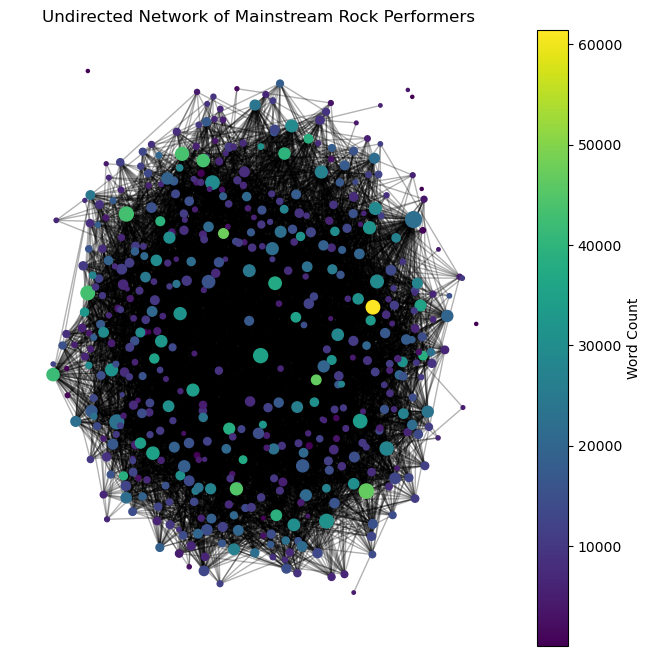

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import requests
# from fa2l.forceatlas2 import ForceAtlas2  # <- correct import

# Load graph
url = r"https://raw.githubusercontent.com/noanorgaard/SocialGraphs/refs/heads/main/Assignment1/rock_music_graph1.graphml"
data = requests.get(url).text
G = nx.parse_graphml(data)
# G = G.to_undirected()
# convert directed graph to undirected graph
G_undirected = G.to_undirected()

# plot the undirected graph
plt.figure(figsize=(8,8))
# pos = nx.spring_layout(G_undirected, seed=42, k = 0.8)  # positions for all 
# pos = nx.kamada_kawai_layout(G_undirected)  # positions for all nodes
pos = nx.forceatlas2_layout(G_undirected, max_iter=10, pos=None, strong_gravity=True)  # positions for all nodes
# node sizes based on degree

node_sizes = [5 + 1 * G_undirected.degree(n) for n in G_undirected.nodes()]
# node colors based on word count (content length)
node_colors = [G_undirected.nodes[n]['word_count'] for n in G_undirected.nodes()]
nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)
plt.colorbar(nodes, label='Word Count')
plt.title('Undirected Network of Mainstream Rock Performers')
plt.axis('off')
plt.show()

---


## Exercise 2
We continue with a qualitative inspection of the Wikipedia pages. Inspecting the data manually will develop intuitions that will help us to intepret our quantitative results. We investigate the reasons for links between characters to exist on Wikipedia.

- Consider the nodes with highest in-degree in the network. Open the corresponding Wikipedia page.
- Consider the set of neighbours pointing towards the node found above.
- What is the relation between the band/mucisians you identified and their network neighbours? (e.g. did they sing a song together, did one write a song for the other?, etc ...). You don't need to come up with a grand theory of Rock Music here, I just want you to think about how links arise, why the links are there.


In [2]:
top_in_degrees = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[0]
print("Node with highest in-degree:", top_in_degrees)

neighbors_in = list(G.predecessors(top_in_degrees[0]))
print(f" Led Zeppelin has {len(neighbors_in)} neighbors pointing to it.")
print("Some of the neighbors pointing to Led Zeppelin:", neighbors_in[:10])

Node with highest in-degree: ('Led_Zeppelin', 117)
 Led Zeppelin has 117 neighbors pointing to it.
Some of the neighbors pointing to Led Zeppelin: ['311_(band)', 'ABBA', 'Bryan_Adams', 'Aerosmith', 'Alice_in_Chains', 'The_Allman_Brothers_Band', 'Alter_Bridge', 'Arctic_Monkeys', 'Audioslave', 'Avenged_Sevenfold']


Some neighbors pointing to it 'Arctic_Monkeys', ABBA and Aerosmith.

On the Arctic monkeys page Led Zeppelin is refered to by a label exec in a general quote: "...every 13-year-old loves them."
 But so do gBryan_Adams"
and led zeppelin has praised the band.

Abba shared studio with led zeppelin at one point - Led zeppelin reffered to as one of the notable bands sharing  the studio. 

Bryan adams was influenced by Led Zeppelin 

So in general led zeppelin is referred to many times because it is such a big and influential band, that is reffered to on lists of notable bands using a studio, and in general comments "granddad who likes led zeppelin" and general influencers of later Bands and singers 

---


- Repeat the exercise for the highest out-degree node.
- Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur in Wikipedia. Answer in your own words.


In [3]:
import random
top_out_degrees = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[0]
print("Node with highest out-degree:", top_out_degrees)

neighbors_out = list(G.predecessors(top_out_degrees[0]))
rand_neighbors = random.sample(neighbors_out, min(10, len(neighbors_out)))

print(f"10 randomly picked neighbors that {top_out_degrees[0]} points to:", rand_neighbors)

Node with highest out-degree: ('Alice_in_Chains', 71)
10 randomly picked neighbors that Alice_in_Chains points to: ['Avenged_Sevenfold', 'Lamb_of_God_(band)', 'Ozzy_Osbourne', 'Elton_John', 'Godsmack', 'Bush_(British_band)', 'Finger_Eleven', 'Drowning_Pool', 'Nirvana_(band)', 'Korn']


Alice in chains was influenced by Black sabbath and therefore they refference them. 
same for elton john 
Godsmack wsa influenced by alice in chains 

there does not seem to be a big difference between in and out degree

Generally the bigger a band is the bigger their wikipidia page is and the more is generally known about them and therefore the more refferences they will have

--- 

- Create a scatter plot, where each node is a point, and the axes show in- versus out-degree. That way you can visually inspect the patterns of how in- and out-degree are connected across all the nodes in the network. Comment on what you see.
- Are there any nodes with high(ish) out-degree and with few incoming connections? If yes, open WikiPages of those bands/mucisians and explain what happens?
- Are there any nodes with high in-degree and few going connections? Again, open the WikiPages corresponding to those nodes and explain what happens?

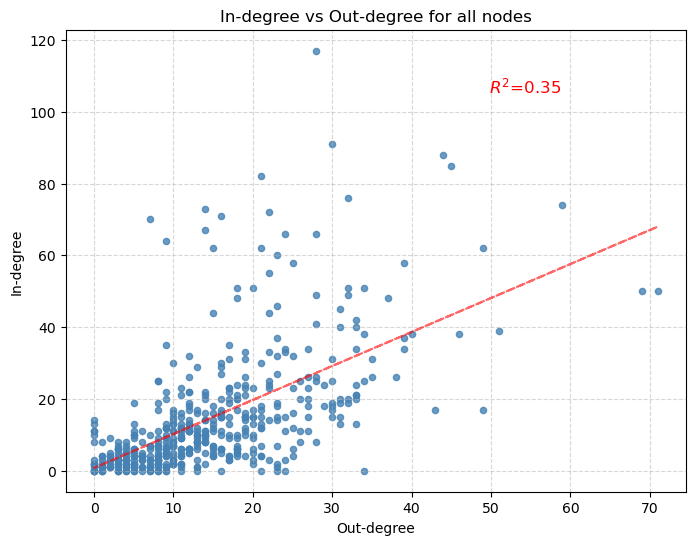

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Compute in- and out-degrees
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(
    list(out_degrees.values()), 
    list(in_degrees.values()), 
    alpha=0.8, 
    s=20, 
    c="steelblue"
)

# fit a trend line
z = np.polyfit(list(out_degrees.values()), list(in_degrees.values()), 1)
p = np.poly1d(z)
plt.plot(list(out_degrees.values()), p(list(out_degrees.values())), "r--", alpha=0.6)
# get R^2 value
from sklearn.metrics import r2_score
r2 = r2_score(list(in_degrees.values()), p(list(out_degrees.values())))
plt.text(0.7*max(out_degrees.values()), 0.9*max(in_degrees.values()), f"$R^2$={r2:.2f}", fontsize=12, color="red")

plt.xlabel("Out-degree")
plt.ylabel("In-degree")
plt.title("In-degree vs Out-degree for all nodes")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
     

We see a slight linear trend, where most that has a high in degree also has a high out degree. The bigger youre wikipage is the bigger in- and out-degree you'll likely have 

In [5]:
# find nodes with high out-degree and low in-degree
high_out_low_in = [n for n in G.nodes() if out_degrees[n] > 30 and in_degrees[n] < 5]
print("Nodes with high out-degree and low in-degree:", high_out_low_in)
# find nodes with high in-degree and low out-degree
high_in_low_out = [n for n in G.nodes() if in_degrees[n] > 65 and out_degrees[n] < 10]
print("Nodes with high in-degree and low out-degree:", high_in_low_out)

Nodes with high out-degree and low in-degree: ['Mötley_Crüe']
Nodes with high in-degree and low out-degree: ['Elvis_Presley']


In [6]:
# print in and out degrees of these nodes
for n in high_out_low_in:
    print(f"Node: {n}, Out-degree: {out_degrees[n]}, In-degree: {in_degrees[n]}")
for n in high_in_low_out:
    print(f"Node: {n}, In-degree: {in_degrees[n]}, Out-degree: {out_degrees[n]}")

Node: Mötley_Crüe, Out-degree: 34, In-degree: 0
Node: Elvis_Presley, In-degree: 70, Out-degree: 7



Môtley Crüe has high out degree and low in_degree (zero) (Mötley_Crüe, Out-degree: 34, In-degree: 0).  

Elvis presley has low outdegree and high in-degree (Elvis_Presley, In-degree: 70, Out-degree: 7)

